# In this notebook I am exploring the datasets to build plots to ilustrate my conclusions and to anser some questions about the users. 

In [96]:
import os
import pymysql
import dotenv
from dotenv import load_dotenv
load_dotenv()

HOST = os.getenv('HOST')
USER = os.getenv('MYSQL_USER')
PASSWORD = os.getenv('MYSQL_ROOT_PASSWORD')
DB = os.getenv('MYSQL_DATABASE')

connection = pymysql.connect(host=HOST, 
                      user = USER,
                     password = PASSWORD,
                     db = DB)

cursor = connection.cursor()

# Are the players of legal age?
>I am going to look in the player_monthly_stats table to found what days were the most played days.

### Obs: There are a single record to each player:

In [8]:
query1 = 'SELECT DISTINCT player_id FROM player_monthly_stats'
query2 = 'SELECT player_id FROM player_monthly_stats'
cursor.execute(query1) == cursor.execute(query2)

True

### Obs: There is only one date, in player_monthly table: 01/02/2020:

In [1]:
cursor.execute('SELECT ref_date FROM player_monthly_stats')
#cursor.fetchall()
#This is returned: ((datetime.date(2020, 2, 1),),

## Using the matchmaking_stats_summary table


In [93]:
query = "select DISTINCT DATE_FORMAT(updated_at, '%c %d %Y') from matchmaking_stats_summary"
cursor.execute(query)
"""It means that there are 6 distincts updated_at dates in this table""" 

6

In [94]:
cursor.execute(query)
cursor.fetchall()

(('2 01 2020',),
 ('2 02 2020',),
 ('2 03 2020',),
 ('2 04 2020',),
 ('2 05 2020',),
 ('2 06 2020',))

In [103]:
whole_week = "SELECT matches_played FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-01' AND '2020-02-07'"
cursor.execute(whole_week)

2057

In [105]:
work_days = "SELECT matches_played FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-03' AND '2020-02-07'"
cursor.execute(work_days)

1318

In [106]:
weekend_days = "SELECT matches_played FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-01 00:00:00' AND '2020-02-02 23:59:59'"
cursor.execute(weekend_days)

739

>As I don't have a large amount of different day date, I can't suppose average age of players by the played date. I am talking about the played days, not about the player skills.

# How is the Player Skills?
>I am looking for a way to analyse the players wins or players headshot relation by number of matches played.

In [1]:
import pandas as pd
match = pd.read_csv('../csv/matchmaking_stats.csv')
match

/home/visus/.pyenv/versions/3.7.0/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,player_id,matches_played,total_wins,total_loss,mm_points,kills,death,assist,hs,created_at,updated_at
0,354985,1,1,0,3,13,13,5,6,2020-02-01 00:47:32,2020-02-01 00:47:32
1,152268,1,0,1,-1,15,20,3,2,2020-02-01 00:54:01,2020-02-01 00:54:01
2,679247,1,0,1,-1,7,23,5,4,2020-02-01 01:00:31,2020-02-01 01:00:31
3,604607,1,0,1,-1,11,21,3,8,2020-02-01 01:03:02,2020-02-01 01:03:02
4,325203,1,1,0,3,21,13,2,11,2020-02-01 01:04:02,2020-02-01 01:04:02
...,...,...,...,...,...,...,...,...,...,...,...
2052,500543,2,1,1,2,23,35,7,18,2020-02-06 23:51:02,2020-02-06 23:51:02
2053,576674,1,1,0,3,11,12,3,1,2020-02-06 23:56:31,2020-02-06 23:56:31
2054,640357,8,2,6,0,77,169,37,25,2020-02-06 23:56:31,2020-02-06 23:56:31
2055,758201,1,1,0,3,17,13,3,15,2020-02-06 23:56:31,2020-02-06 23:56:31


In [2]:
#Removing the unnecessaries columns
my_df = match.drop(columns=['created_at', 'updated_at'])
my_df

,player_id,matches_played,total_wins,total_loss,mm_points,kills,death,assist,hs
0,354985,1,1,0,3,13,13,5,6
1,152268,1,0,1,-1,15,20,3,2
2,679247,1,0,1,-1,7,23,5,4
3,604607,1,0,1,-1,11,21,3,8
4,325203,1,1,0,3,21,13,2,11
...,...,...,...,...,...,...,...,...,...
2052,500543,2,1,1,2,23,35,7,18
2053,576674,1,1,0,3,11,12,3,1
2054,640357,8,2,6,0,77,169,37,25
2055,758201,1,1,0,3,17,13,3,15


* __The Best players:__

In [14]:
#The dataframe of players whose have wins > loss
my_df_wins = my_df.loc[my_df['total_wins'] > my_df['total_loss']]
my_df_wins

,player_id,matches_played,total_wins,total_loss,mm_points,kills,death,assist,hs
0,354985,1,1,0,3,13,13,5,6
4,325203,1,1,0,3,21,13,2,11
6,35792,1,1,0,3,17,18,4,12
8,1129344,1,1,0,3,13,19,5,11
10,321178,1,1,0,3,12,23,8,9
...,...,...,...,...,...,...,...,...,...
2041,1148268,1,1,0,3,5,11,0,1
2043,590695,17,10,7,23,230,344,67,161
2049,802646,1,1,0,3,14,9,0,7
2053,576674,1,1,0,3,11,12,3,1


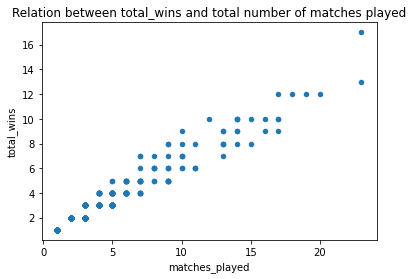

In [15]:
my_df_wins.plot(x = 'matches_played', 
           y = 'total_wins', 
           kind = 'scatter', 
           title = 'Relation between total_wins and total number of matches played')
plt.savefig('images/my_df_wins_distribution.png', dpi=400)

* __The players whose not best yet:__

In [12]:
#The dataframe of players whose have wins <= loss
my_df_loss = my_df.loc[my_df['total_wins'] <= my_df['total_loss']]
my_df_loss

,player_id,matches_played,total_wins,total_loss,mm_points,kills,death,assist,hs
1,152268,1,0,1,-1,15,20,3,2
2,679247,1,0,1,-1,7,23,5,4
3,604607,1,0,1,-1,11,21,3,8
5,95479,1,0,1,-1,14,22,6,4
7,679130,1,0,1,-1,15,21,2,5
...,...,...,...,...,...,...,...,...,...
2050,1181434,1,0,1,-1,7,16,4,4
2051,168613,1,0,1,-1,10,17,2,7
2052,500543,2,1,1,2,23,35,7,18
2054,640357,8,2,6,0,77,169,37,25


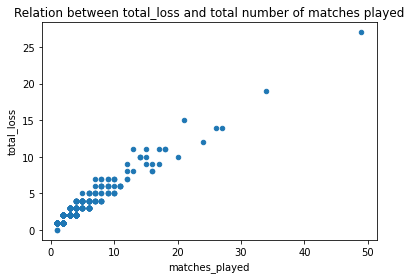

In [16]:
my_df_loss.plot(x = 'matches_played', 
           y = 'total_loss', 
           kind = 'scatter', 
           title = 'Relation between total_loss and total number of matches played')
plt.savefig('images/my_df_loss_distribution.png', dpi=400)

>The intersting stuf here is the fact that Gamers Club has the Hard players and even the not to Hard players. It means there are opportunite to grow up in Gamers Club. 

* __The choice of scatter plots is given because we are verifying cause and effect relationships between quantitative variables.__

* __Date__

In [7]:
players = pd.read_csv('../csv/players.csv')
players

,player_id,cadastrado_em
0,354985,2017-03-22 23:26:45
1,152268,2016-08-17 00:53:55
2,679247,2018-02-28 23:27:44
3,604607,2018-01-10 23:17:56
4,325203,2017-02-22 13:04:37
...,...,...
3640,999349,2019-03-08 18:46:37
3641,96913,2016-04-29 23:20:49
3642,351388,2017-03-19 00:11:58
3643,982190,2019-02-21 17:27:36


In [8]:
#Creating a dictionary of year: number of create accounts
dicionario = {
    2013 : 0,
    2014 : 0,
    2015 : 0,
    2016 : 0,
    2017 : 0,
    2018 : 0,
    2019 : 0,
    2020 : 0,
}
for index, row in players.iterrows():
        if int(row['cadastrado_em'][0:4]) in dicionario.keys():
            n = int(row['cadastrado_em'][0:4])
            dicionario[n] += 1
        pass


In [9]:
#This way I get a dictionary{year_date: number_of_created_accounts} 
print(dicionario) 
print(sum(dicionario.values()))

{2013: 12, 2014: 21, 2015: 201, 2016: 682, 2017: 816, 2018: 925, 2019: 891, 2020: 97}
3645


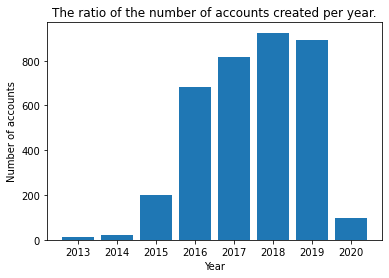

In [33]:
plt.bar(*zip(*dicionario.items()))
plt.title('The ratio of the number of accounts created per year.')
plt.xlabel('Year')
plt.ylabel('Number of accounts')
plt.savefig('images/accountbydate.png', dpi=400)
plt.show()

>Analysing the above image we can see the number of account growth. We need to remeber that the source used to build this chart have values only until the date of 2020-02-06, that is the main reason of the number of account of 2020 is smaller than the neighborhood. 

In [20]:
dicionario_mes = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0
}
for index, row in players.iterrows():
        if int(row['cadastrado_em'][5:7]) in dicionario_mes.keys():
            n = int(row['cadastrado_em'][5:7])
            dicionario_mes[n] += 1
        pass

In [25]:
print(dicionario_mes)
print(sum(dicionario_mes.values()))

{1: 481, 2: 329, 3: 297, 4: 279, 5: 228, 6: 245, 7: 264, 8: 310, 9: 246, 10: 267, 11: 303, 12: 396}
3645


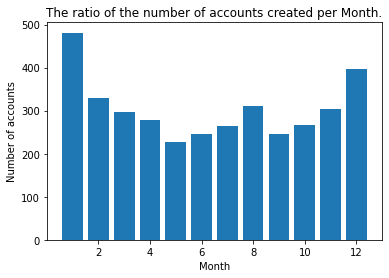

In [32]:
plt.bar(*zip(*dicionario_mes.items()))
plt.title('The ratio of the number of accounts created per Month.')
plt.xlabel('Month')
plt.ylabel('Number of accounts')
plt.savefig('images/accountbymonth', dpi=400, format="png")
plt.show()

>Analysing the above image we can see what is the month when more accounts has been created. 

* __The choice of bar plots is given because we are handling discrete variables, therefore the choice of a discrete plot is the best choice to represent the relation above.__